# Task 1: Prediction using Supervised ML
The goal of this task is to **'Predict the percentage of an student based on the no. of study hours**
In this analysis will use a simple linear regression model
The dataset provided comes with the Total Hours a student studied per day and the outcome score of the student.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

## Data Preparation
Within this stage I will read the data file into a dataframe so I can analyse, visualise and model the data fields.

In [2]:
#Using pandas read_csv() function to read the given student scores csv file
df = pd.read_csv('student_scores - student_scores.csv')
#Displaying the first 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#check the size of the dataset
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Based on above:
* We have a total of 25 records
* The average amount of hours a students studies per day is roughly 5 hours
* The average score a student recieves is 51% which is a pass
* The highest study duration is 9.2 hours and the highest score was 95%
* The lowest study duration is 1.1 hours and the lowest score was 17%
* Based on the standard deviation for both hours and scores there is not a large spread

## Data Visualisation
I will do some small visualisations on the data to determine the spread and trends. I will do this through histograms and a scatter plot.


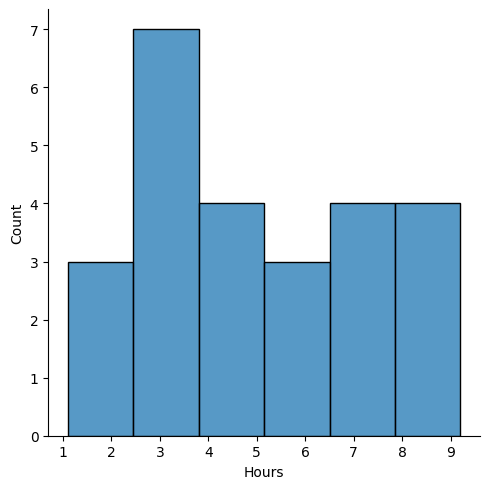

In [5]:
sns.displot(x='Hours', data = df)

Based on the Hours it seems most student spend roughly 3 hours studying per day. Additionally we can see that 8 students spend longer than 7 hours.

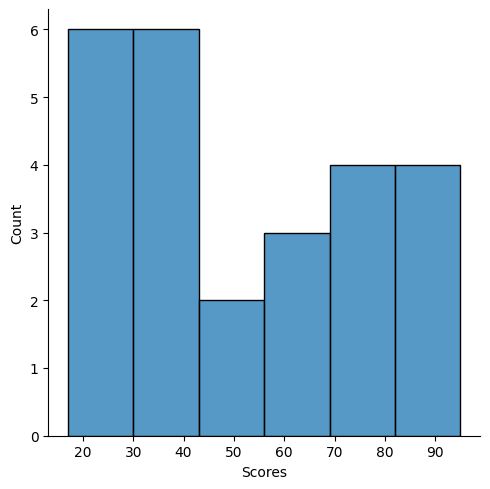

In [6]:
sns.displot(x='Scores', data =df)

Based on the students it seems a large amount of them recieved a score within the 10-40 range which is below 50%.

Text(0, 0.5, 'Scores')

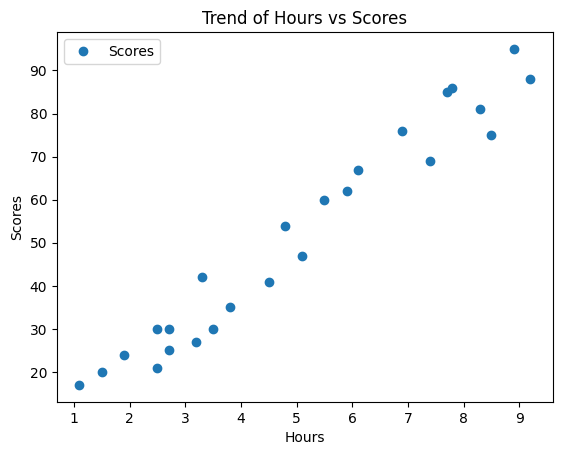

In [7]:
# Comparing the two variables 
df.plot(x='Hours', y='Scores', style='o')
plt.title('Trend of Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

Based on the trend between the two variables it looks like there is a strongly positive correlation between both the Student's Scores and study hours. As the longer the hours the higher the scores become.

## Data Modelling 
Within this phase I will:
* Split the data into train and test set
* define a linear regression model
* fit the training data to this model
* Produce the trendline (equation) of the model
* Compare the predicted scores to our actual testing scores

In [8]:
#Using pandas to store the the X value (Hours) and y value (Scores) into items in an array to prepare for the train and test split
X = df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [9]:
#Using sklearn's train_test_split() function to split the data into X and y train and test where the size of our test data is 20% of our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Defining the Linear regression model
model = LinearRegression()
# fitting the model with and X and y train dataset
model.fit(X_train, y_train)

LinearRegression()

Below I will visualise the trend of the linear regression model:

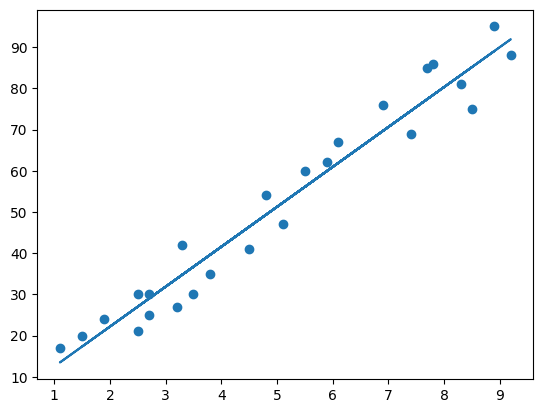

In [11]:
# The equation of a linear regression line is y = mx +b, the defined variable line produces this equation
line = model.coef_*X+model.intercept_
#plotting the line equation with matplolib 
plt.scatter(X,y)
plt.plot(X, line)
plt.show()

Based on our Linear regression line the trend seems to follow a strongly positive incline.

Now to see how efficient the model is I will compare the prediced results to our test set results.

In [12]:
#use sklearn's .predict to get predicted values
y_pred = model.predict(X_test)

In [13]:
# Comparing the actual to predicted scores through a data frame to make it easy to visually compare
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Based on the above data frame the predicted scores seem to be fairly similar to the actual scores. This is fairly good based on the amount of records (5 records for the test data and a total of 25 records). We will future analyse this with other metrics within the Data Evaluation stage.

## Predicting the score of a student who studies 9.25 hrs a day
This can easily be done through using the .predict function in sklearn

In [14]:
# Sample hour must be places into the format of our arrays which is [[value1, value2,...,valueN]] but only a single value
hours = [9.25]
test_pred = model.predict([hours])
#first element of our prediction should be the predicted student's score
print(f'A student who studies 9.25 hours may recieve a score of {test_pred[0].round(1)}!')


A student who studies 9.25 hours may recieve a score of 92.4!


## Data Evaluation 
Within the evaluation stage I check the following based on the produced model:
* R squared - Determine how well the data fits the model (proportion of variance in the dependent variable explained by the indepdent variable)
* Mean Absolute Error (MAE) - Used to determine the accuracy based on the absolute difference between the predict and actual test scores.
* Mean Square Error (MSE) - Used to determine the accuracy based on the difference between the predicted and actual test scores.
* Root Square Error (RMSE) - Is the sqrt(MSE), it measures the quality of the predictions by additionally indiscating the effect of large errors

In [16]:
r_sq = model.score(X,y)
r_sq.round(2)

0.95

Based on the r squared score above our model has about a 95% variance that student scores are explained by the variance of student hours. This shows that this model is considered reliable based on the given data size.

The 

In [17]:
#MAE
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred).round(2)}')
#MSE
print(f'Mean Square Error: {metrics.mean_squared_error(y_test, y_pred).round(2)}')
#RMSE
print(f'Root Mean Square Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2)}')

Mean Absolute Error: 3.92
Mean Square Error: 18.94
Root Mean Square Error: 4.35


Based on the following scores above our results are fairly accuracy with only a minor difference. MSE does seems to have a larger difference of 19 however this is still not a large significant difference.

## Conclusion
Ultimately our model may be fairly reliable, as there is a minor difference between the predicted and actual test scores and our model follows a strongly positive correlation|. However this might be the case due to the small size of data of 25 records we currently have. With more data on students possibly 100 - 10000 we can produce more reliable results and more of a conclusion of interest. 